In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import scipy.optimize as solver
from functools import reduce

In [2]:
Portfolio1 = pd.read_csv('Portfolio1.csv').drop('Unnamed: 0',axis=True)
Portfolio2 = pd.read_csv('Portfolio2.csv').drop('Unnamed: 0',axis=True)

In [3]:
Portfolio1=Portfolio1*52
Portfolio2=Portfolio2*52

In [5]:
q=7
given_r = np.arange(.01, .12, .0001)
def sd(w):
    return np.sqrt(reduce(np.dot, [w, Portfolio2.cov(), w.T]))

x0 = np.array([1.0 / q for x in range(q)])
bounds = tuple((0, 1) for x in range(q))

given_r = np.arange(.01, .12, .0001)
risk = []

for i in given_r:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: sum(x * Portfolio2.mean()) - i}]
    outcome = solver.minimize(sd, x0=x0, constraints=constraints, bounds=bounds)
    
    risk.append(outcome.fun)

In [7]:
q=6
given_r = np.arange(.01, .12, .0001)
def sd(w):
    return np.sqrt(reduce(np.dot, [w, Portfolio1.cov(), w.T]))

x0 = np.array([1.0 / q for x in range(q)])
bounds = tuple((0, 1) for x in range(q))

given_r = np.arange(.01, .12, .0001)
risk2 = []

for i in given_r:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: sum(x * Portfolio1.mean()) - i}]
    outcome = solver.minimize(sd, x0=x0, constraints=constraints, bounds=bounds)
    
    risk2.append(outcome.fun)

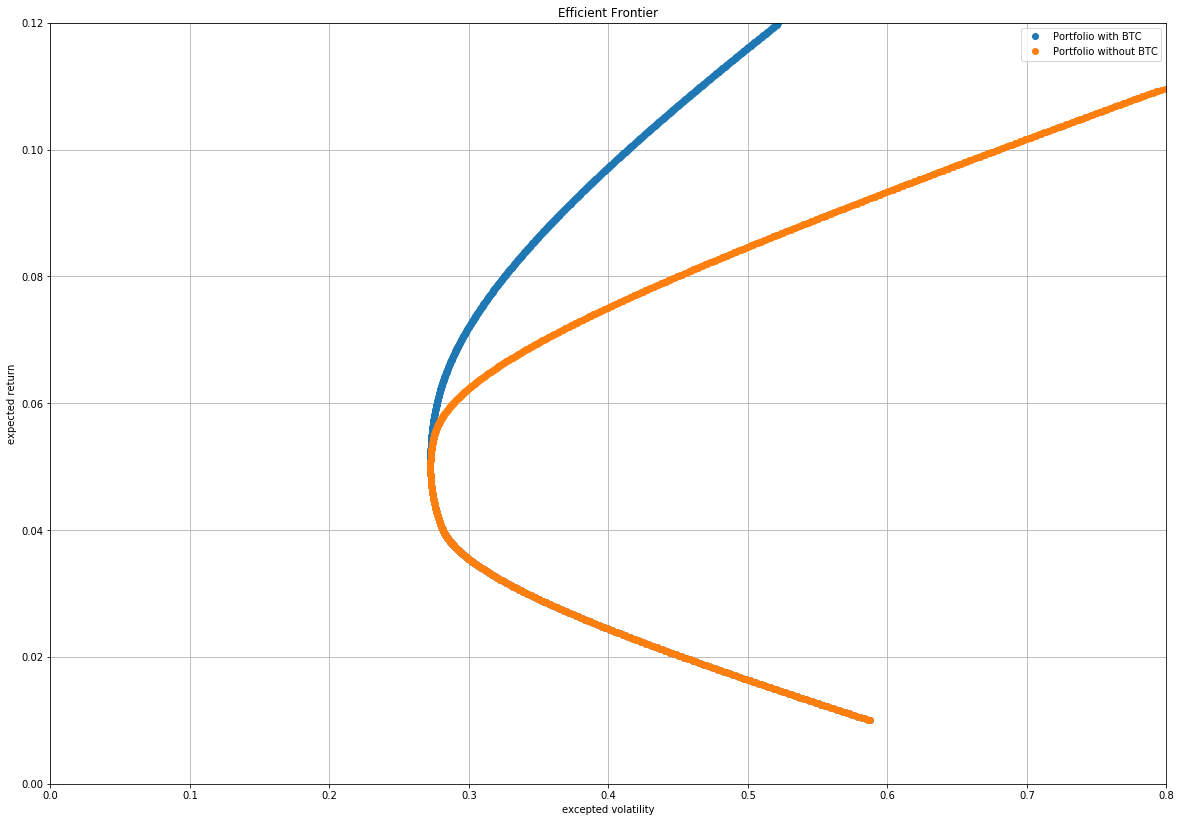

In [8]:
fig, axes = plt.subplots( figsize=(20,14))
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.plot(risk, given_r, 'o')
plt.plot(risk2, given_r, 'o')
axes.set_xlim([0, 0.8])
axes.set_ylim([0, 0.12])
axes.set_title('Efficient Frontier')
axes.legend(['Portfolio with BTC','Portfolio without BTC'])